In [1]:
print('Hello, world!')

Hello, world!


In [3]:
# A class serves as a way to create objects in python. An object is just something which holds data
# and functions which operate on that data. 
# The whole point of a class is that it allows us to create reusable pieces of code.

# There are two aspects to the Class, the __init__ or initialisation of the class and the methods of the 
# parts where there is a def. 
# Starting with the def we can define a function, which you can think of in the same way as a mathematical
# function, in that you will give it some input and modify it in some way and get an output.

# We first write class and the name of the class
class Value:
    # This is the intialisation method it will initialise the Value object
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out

In [6]:
# Here's a more explicit example
dog_name = 'Buster'
print(dog_name)
print('Woof')

Buster
Woof


In [7]:
class Dog:
    def __init__(self, name):
        self.name = name
    def woof(self):
        print('Woof!')

In [13]:
buster = Dog('Buster')
print(buster.name)
buster.woof()

Buster
Woof!


In [15]:
def f(x):
    return x**2 + 2*x + 1

In [16]:
f(10)

121

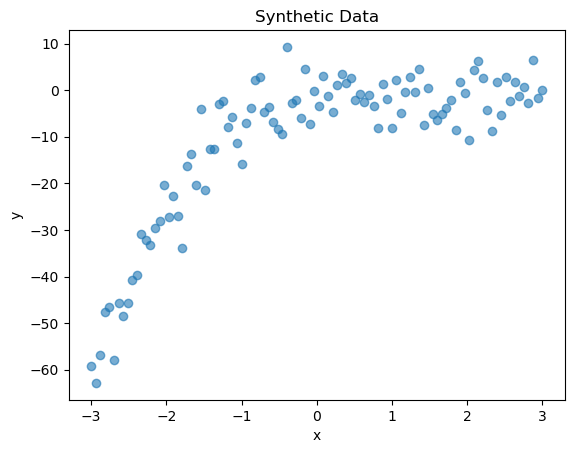

In [29]:
plt.scatter(x_data, y_data, label='Synthetic Data', alpha=0.6)
plt.title('Synthetic Data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

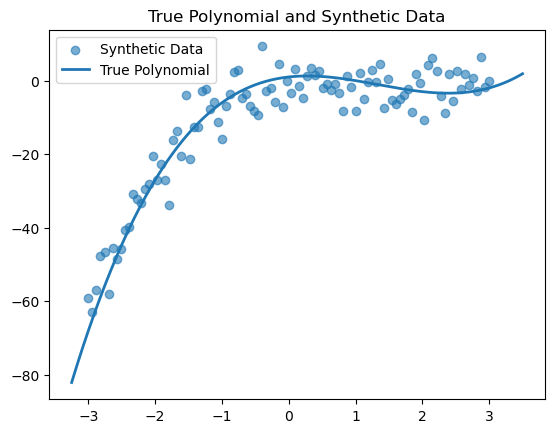

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Define polynomial function: f(x) = x^3 - 4x^2 + 2x + 1
def true_polynomial(x):
    return x**3 - 4*x**2 + 2*x + 1

# Generate synthetic data
np.random.seed(0)
x_data = np.linspace(-3, 3, 100)
y_data = true_polynomial(x_data) + np.random.normal(scale=5, size=len(x_data))

# Plot the true polynomial and synthetic data
plt.scatter(x_data, y_data, label='Synthetic Data', alpha=0.6)
x_range = np.linspace(-3.25, 3.5, 400)
plt.plot(x_range, true_polynomial(x_range), label='True Polynomial', linewidth=2)
plt.legend()
plt.title('True Polynomial and Synthetic Data')
plt.show()


In [25]:
# !pip install torch
import torch
import torch.nn as nn
import torch.optim as optim

# Define neural network model
class SimpleNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(input_dim, hidden_dim)
        self.layer2 = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = self.layer2(x)
        return x

# Initialize model, loss function, and optimizer
input_dim, hidden_dim, output_dim = 1, 50, 1
model = SimpleNN(input_dim, hidden_dim, output_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Convert data to PyTorch tensors
x_tensor = torch.FloatTensor(x_data).view(-1, 1)
y_tensor = torch.FloatTensor(y_data).view(-1, 1)


loss: 7.201869964599609


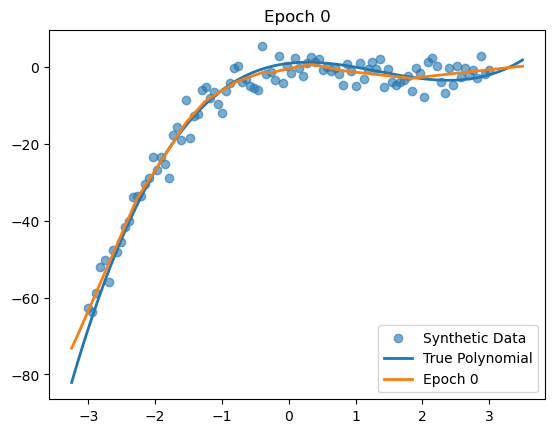

loss: 7.189730644226074


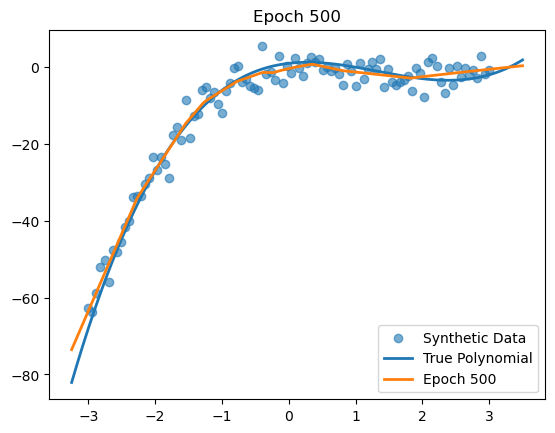

loss: 7.176321506500244


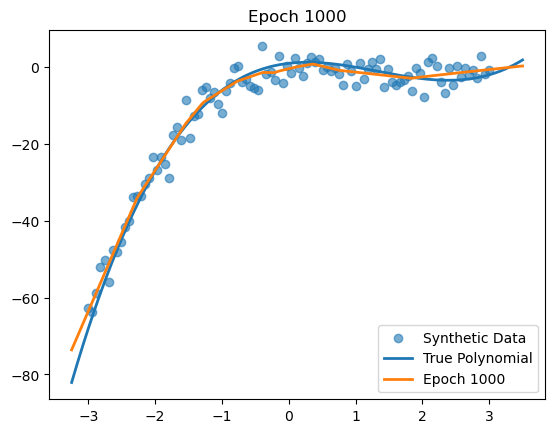

loss: 7.158868312835693


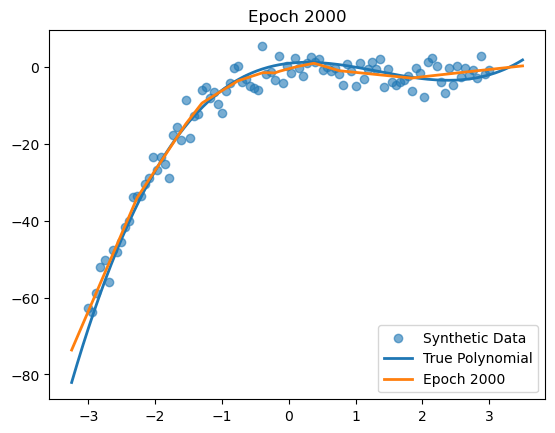

In [27]:
# Initialize lists to store plots
plots = []

# Training loop
epochs = 2001
for epoch in range(epochs):
    # Forward pass
    y_pred = model(x_tensor)
    loss = criterion(y_pred, y_tensor)
    
    # Zero gradients, backward pass, optimizer step
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Visualization at specific epochs
    if epoch in [0, 500, 1000, 2000]:
        print(f'loss: {loss}')
        with torch.no_grad():
            y_pred_range = model(torch.FloatTensor(x_range).view(-1, 1)).numpy()
        plt.scatter(x_data, y_data, label='Synthetic Data', alpha=0.6)
        plt.plot(x_range, true_polynomial(x_range), label='True Polynomial', linewidth=2)
        plt.plot(x_range, y_pred_range, label=f'Epoch {epoch}', linewidth=2)
        plt.legend()
        plt.title(f'Epoch {epoch}')
        plt.show()


What does this show us?

It is an example of a neural network learning a function through optimising its parameters (weights & biases).
We see it starts off with a very poor approximation of the function